In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from montlake.plotting.manifolds import plot_manifold_2d, plot_manifold_3d,plot_manifold_featurespace
from montlake.plotting.plotting import plot_cosines, get_cmap,get_names, plot_cosines_cluster
from montlake.plotting.flasso import plot_reg_path_ax_lambdasearch_customcolors_norm,plot_watch_custom, plot_watch,plot_cos_boxes
import dill as pickle
import pathos
from montlake.utils.utils import data_stream_custom_range, cosine_similarity
from pathos.multiprocessing import ProcessingPool as Pool
from montlake.atomgeom.features import get_features
from montlake.utils.utils import get_atoms4_full, get_index_matching, get_cosines
from montlake.utils.replicates import get_detected_values2d
import numpy as np
import itertools
import seaborn as sns
from matplotlib.patches import Rectangle

# export
import numpy as np
import random
import argparse
import json
import sys
import scipy
from montlake.vendor.tfcompat.hparam import HParams
import os
import dill as pickle

random.seed(1234)

config = {}
with open('/Users/samsonkoelle/tunatostada/experiments/configs_plotting/eth_full_mf.json') as f:
    config.update(json.load(f))

hparams = HParams(**config)
if not os.path.exists(hparams.outdir):
    os.makedirs(hparams.outdir)

positions = np.load(hparams.position_file)
for key in hparams.ground_truth.keys():
    if hparams.ground_truth[key] is None:
        hparams.ground_truth[key] = np.asarray([])
    hparams.ground_truth[key] = np.asarray(hparams.ground_truth[key], dtype = int)

print('plotting',hparams.ground_truth)
#if not hparams.color_counts_all:
#    hparams.color_counts_all = None

plotting {'atoms4': array([[6, 1, 0, 2],
       [1, 0, 2, 8]]), 'atoms3': array([], dtype=int64), 'atoms2': array([], dtype=int64)}


In [2]:
result_file = hparams.result_file
positions = positions
d = hparams.d
name = hparams.name
ncord = hparams.ncord
embedding = hparams.embedding
ground_truth = hparams.ground_truth
colors_gt = hparams.ground_truth_colors
outdir = hparams.outdir
color_counts_all = hparams.color_counts_all
colors_id_all = hparams.colors_id_all
n_components = hparams.n_components
ptsize = hparams.ptsize
alpha = hparams.alpha
gt_reg_color = hparams.gt_reg_color
sel_reg_color = hparams.sel_reg_color
plot_watch_full = hparams.plot_watch_full
plot_watch_results = hparams.plot_watch_results
cosine_color = hparams.cosine_color
selected_cosines = hparams.selected_cosines
cosine_cluster = hparams.cosine_cluster
names_gt = None

In [3]:
    
    print('loading data')
    with open(result_file,'rb') as inp:
        results = pickle.load(inp, pickle.HIGHEST_PROTOCOL)
        
    atoms4 = results['dictionary']['atoms4']
        
    p = results['replicates_small'][0].dg_M.shape[2]
    nreps = results['supports_lasso'][1].shape[0]
    embed = results['embed']
    
    if ground_truth is not None:
        print('compute ground truth values for comparison' )
        cores = pathos.multiprocessing.cpu_count() - 1
        pool = Pool(cores) 
        n = positions.shape[0]
        gt_results = pool.map(lambda i: get_features(positions[i],
                                   atoms2 = ground_truth['atoms2'],
                                   atoms3 = ground_truth['atoms3'],
                                   atoms4 = ground_truth['atoms4']),
            data_stream_custom_range(list(range(n))))
        values_gt = np.vstack([np.hstack(gt_results[i]) for i in range(n)])


loading data
compute ground truth values for comparison


In [6]:
values_gt.shape

(50000, 2)

In [ ]:

    print('getting ground truth names')
    if names_gt is None and ground_truth is not None:
        natoms = positions.shape[1]
        #atoms4 = np.asarray(list(itertools.combinations(range(natoms), 4))) 
        superset = results['dictionary']['atoms4']#get_atoms4_full(atoms4) #needs adjustment for diagram dictionaries
        if d == 2:
            j1 = get_index_matching(ground_truth['atoms4'][0], superset) #needs adjustment for non torsion ground truths
            j2 = get_index_matching(ground_truth['atoms4'][1], superset)
            gt_ind = [j1,j2]
            names_gt = get_names(np.asarray(gt_ind))
        if d ==1:
            j1 = get_index_matching(ground_truth['atoms4'][0], superset)
            gt_ind = [j1]
            names_gt = get_names(np.asarray(gt_ind))
            
#     if ground_truth is not None:
#         print('plotting ground truth function values')
#         for k in range(len(gt_ind)):
#             title = names_gt[k] +' ' +  str(atoms4[gt_ind[k]] + 1)
#             if n_components == 3:
#                 plot_manifold_3d(embed, ptsize, alpha, values_gt[:,k], title,title_color = colors_gt[k])#, title_color = colors[s])  
#             if n_components == 2:
#                 plot_manifold_2d(embed, ptsize, alpha, values_gt[:,k], title,title_color = colors_gt[k])
            
    if ground_truth is None:
        gt_ind = []
        colors_gt = np.empty((0,4), int)
        
    print('cca', color_counts_all)
    if color_counts_all is not None:
        print('getting all colors')
        colors_all = np.empty((0,4), int)
        for c in range(len(color_counts_all)):
            colors_all = np.vstack([colors_all, np.repeat([colors_id_all[c]], color_counts_all[c], axis = 0)])
    
    print('getting colors and names of selected functions')
    selected_lasso = results['selected_lasso']

loading data
compute ground truth values for comparison
getting ground truth names
cca None
getting colors and names of selected functions
plotting top coordinates in feature space
0
1
2
3
4
5
plotting sample regularization path
plotting watches
plotting full cosine matrix clustered
plotting cosines of ground truth and selected lasso
plotting cosines of ground truth and selected ts
getting correlations with ground truth
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


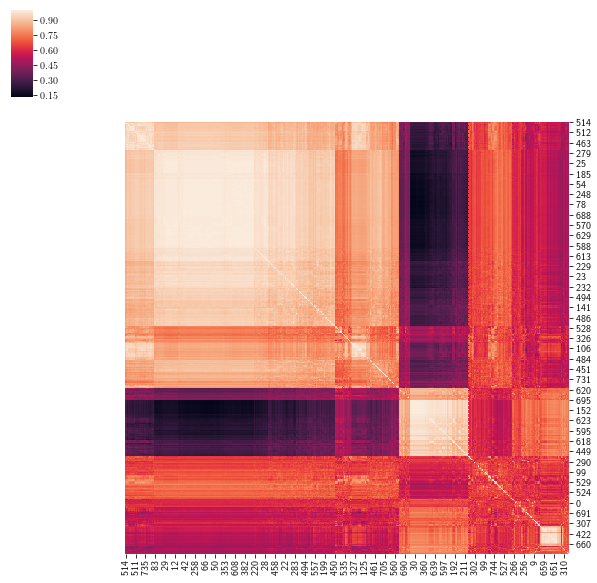

In [85]:
print('loading data')
with open(result_file,'rb') as inp:
    results = pickle.load(inp, pickle.HIGHEST_PROTOCOL)

atoms4 = results['dictionary']['atoms4']

p = results['replicates_small'][0].dg_M.shape[2]
nreps = results['supports_lasso'][1].shape[0]
embed = results['embed']

if ground_truth is not None:
    print('compute ground truth values for comparison' )
    cores = pathos.multiprocessing.cpu_count() - 1
    pool = Pool(cores) 
    n = positions.shape[0]
    gt_results = pool.map(lambda i: get_features(positions[i],
                               atoms2 = ground_truth['atoms2'],
                               atoms3 = ground_truth['atoms3'],
                               atoms4 = ground_truth['atoms4']),
        data_stream_custom_range(list(range(n))))
    values_gt = np.vstack([np.hstack(gt_results[i]) for i in range(n)])

print('getting ground truth names')
if names_gt is None and ground_truth is not None:
    natoms = positions.shape[1]
    #atoms4 = np.asarray(list(itertools.combinations(range(natoms), 4))) 
    superset = results['dictionary']['atoms4']#get_atoms4_full(atoms4) #needs adjustment for diagram dictionaries
    if d == 2:
        j1 = get_index_matching(ground_truth['atoms4'][0], superset) #needs adjustment for non torsion ground truths
        j2 = get_index_matching(ground_truth['atoms4'][1], superset)
        gt_ind = [j1,j2]
        names_gt = get_names(np.asarray(gt_ind))
    if d ==1:
        j1 = get_index_matching(ground_truth['atoms4'][0], superset)
        gt_ind = [j1]
        names_gt = get_names(np.asarray(gt_ind))

# if ground_truth is not None:
#     print('plotting ground truth function values')
#     for k in range(len(gt_ind)):
#         title = names_gt[k] +' ' +  str(atoms4[gt_ind[k]] + 1)
#         if n_components == 3:
#             plot_manifold_3d(embed, ptsize, alpha, values_gt[:,k], title,title_color = colors_gt[k])#, title_color = colors[s])  
#         if n_components == 2:
#             plot_manifold_2d(embed, ptsize, alpha, values_gt[:,k], title,title_color = colors_gt[k])

if ground_truth is None:
    gt_ind = []
    colors_gt = np.empty((0,4), int)

print('cca', color_counts_all)
if color_counts_all is not None:
    print('getting all colors')
    colors_all = np.empty((0,4), int)
    for c in range(len(color_counts_all)):
        colors_all = np.vstack([colors_all, np.repeat([colors_id_all[c]], color_counts_all[c], axis = 0)])

print('getting colors and names of selected functions')
selected_lasso = results['selected_lasso']
colors_lasso = get_cmap(selected_lasso)
names_lasso = get_names(selected_lasso)
selected_ts = results['selected_ts']
colors_ts = get_cmap(selected_ts)
names_ts = get_names(selected_ts)
colors_lasso_full = np.zeros((p,4))
colors_lasso_full[selected_lasso] = colors_lasso
colors_ts_full = np.zeros((p,4))
colors_ts_full[selected_ts] = colors_ts

print('plotting top coordinates in feature space')
data = results['data']
title = name + ' top PCA'
plot_manifold_featurespace(data,title,ncord)    
plt.savefig(outdir + '/features')
plt.close()

print('plotting sample regularization path')
if gt_reg_color:
    fig, axes_all = plt.subplots(figsize=(15, 10))
    #colors = np.zeros((p,4))
    #colors[subset_l0_plusgt] = colors_l0_plusgt
    plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all, results['replicates_small'][0].cs_reorder, results['replicates_small'][0].xaxis_reorder / results['replicates_small'][0].xaxis_reorder.max() , fig,colors_all)#axes_all[0].imshow(asdf)
    axes_all.set_title('Regularization path (single replicate)', fontsize = 40)
    axes_all.set_ylabel(r'$||\beta_j||$', fontsize = 40)
    axes_all.set_xticklabels([])
    plt.tight_layout()
    plt.savefig(outdir + '/reg_path_gt')
    plt.close()

if sel_reg_color:
    fig, axes_all = plt.subplots(figsize=(15, 10))
    plot_reg_path_ax_lambdasearch_customcolors_norm(axes_all, results['replicates_small'][0].cs_reorder, results['replicates_small'][0].xaxis_reorder / results['replicates_small'][0].xaxis_reorder.max() , fig,colors_lasso_full)#axes_all[0].imshow(asdf)
    axes_all.set_title('Regularization path (single replicate)', fontsize = 40)
    axes_all.set_ylabel(r'$||\beta_j||$', fontsize = 40)
    axes_all.set_xticklabels([])
    plt.tight_layout()
    plt.savefig(outdir + '/reg_path_sel')
    plt.close()

# if embedding:
#     supports_lasso_values = np.vstack([np.hstack(results['supports_lasso_values'][i]) for i in range(n)])
#     supports_ts_values = np.vstack([np.hstack(results['supports_ts_values'][i]) for i in range(n)])
#     print('plotting selected function values', colors_ts.shape, supports_ts_values.shape)
#     #for s in range(len(results['selected_lasso'])):
#     for s in range(supports_lasso_values.shape[1]):
#         c = supports_lasso_values[:,s]
#         title_color = colors_lasso[s]
#         title = names_lasso[s] + ' ' + str(atoms4[selected_lasso[s]] + 1)

#         if n_components == 3:
#             plot_manifold_3d(embed, ptsize, alpha, c, title,title_color = title_color)#, title_color = colors[s])  
#         if n_components == 2:
#             plot_manifold_2d(embed, ptsize, alpha, c, title,title_color = title_color)#, colors[s])
#         plt.savefig(outdir + '/selected_function_lasso_'+ str(s))
#         plt.close()
#     #for s in range(len(results['selected_ts'])):
#     for s in range(supports_ts_values.shape[1]):
#         title_color = colors_ts[s]
#         title = names_ts[s] + ' ' + str(atoms4[selected_ts[s]] + 1)
#         c = supports_ts_values[:,s]
#         if n_components == 3:
#             plot_manifold_3d(embed, ptsize, alpha, c, title,title_color = title_color)#, colors_ts[s])  
#         if n_components == 2:
#             plot_manifold_2d(embed, ptsize, alpha, c, title,title_color = title_color)#, colors_ts[s])   
#         plt.savefig(outdir + '/selected_function_ts_' + str(s))
#         plt.close()

print("plotting watches")
if plot_watch_full:
    p = results['supports_lasso'][0].shape[0]
    #print(results['supports_lasso'][0].shape, p,colors_all.shape)
    fig, axes_all = plt.subplots(figsize=(15, 10))
    plot_watch_custom(results['supports_lasso'][0], p, axes_all,colors_all, nreps)
    plt.savefig(outdir + '/watch_full')
    plt.close()

if plot_watch_results:
    sub = results['supports_lasso'][0]
    for w in range(len(results['supports_lasso'][0].shape)):
        sub = np.take(sub, selected_lasso, axis = w)
    fig, axes_all = plt.subplots(figsize=(15, 10))
    plot_watch(sub, names=names_lasso, ax = axes_all,colors = colors_lasso, nreps = nreps) 
    axes_all.set_title('Estimated Support', fontsize = 40)
    plt.tight_layout()
    plt.savefig(outdir + '/watch_lasso')
    plt.close()

    sub = results['supports_ts'][0]
    for w in range(len(results['supports_ts'][0].shape)):
        sub = np.take(sub, selected_ts, axis = w)      
    fig, axes_all = plt.subplots(figsize=(15, 10))
    plot_watch(sub, names=names_ts, ax = axes_all,colors = colors_ts, nreps = nreps) 
    axes_all.set_title('Estimated Support', fontsize = 40)
    plt.tight_layout()
    plt.savefig(outdir + '/watch_ts')
    plt.close()

if d > 1:
    if cosine_color:
        cosines_full= results['replicates_small'][0].cosine_abs
        print("plotting full cosine matrix colored",cosines_full.shape)
        fig, axes_all = plt.subplots(figsize=(15, 10))

        plot_cosines(cosines_full, axes_all, colors_all) 
        plt.tight_layout()
        plt.savefig(outdir + '/cosine_colored')
        plt.close()

    if cosine_cluster:
        print("plotting full cosine matrix clustered")
        cosines_full= results['replicates_small'][0].cosine_abs
        plot_cosines_cluster(cosines_full)
        plt.savefig(outdir + '/cosines_clustered')
        plt.close()

    if selected_cosines:
        print("plotting cosines of ground truth and selected lasso")
        selected_lasso_gt = np.concatenate((gt_ind, selected_lasso)) #add 234
        colors_lasso_plusgt = np.vstack([colors_gt, colors_lasso])
        names_lasso_plusgt = np.concatenate((names_gt, names_lasso))
        cuz_l = np.abs(get_cosines(results['replicates_small'][0].dg_M[:,:,selected_lasso_gt]))
        cuz_l0 = np.mean(cuz_l, axis = 0)
        fig, axarr = plt.subplots(figsize=(15, 10))
        plot_cos_boxes(results['supports_lasso'][1], names_lasso_plusgt, cuz_l0, selected_lasso_gt, d , nreps,axarr)
        for xtick, color in zip(axarr.get_xticklabels(), colors_lasso_plusgt):
            xtick.set_color(color)
        for ytick, color in zip(axarr.get_yticklabels(), colors_lasso_plusgt):
            ytick.set_color(color)
        axarr.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{|\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{j'} (\xi_i)\rangle|}{\|grad_{\mathcal M} g_j (\xi_i) \| \| grad_{\mathcal M} g_{j'}(\xi_i) \|} $" ,
                        fontsize = 30)
        plt.tight_layout()
        plt.yticks(rotation= 0)
        plt.savefig(outdir + '/cosines_sellasso_gt')
        plt.close()

        print("plotting cosines of ground truth and selected ts")
        selected_ts_gt = np.concatenate((gt_ind, selected_ts)) #add 234
        colors_ts_plusgt = np.vstack([colors_gt, colors_ts])
        names_ts_plusgt = np.concatenate((names_gt, names_ts))
        cuz_l = np.abs(get_cosines(results['replicates_small'][0].dg_M[:,:,selected_ts_gt]))
        cuz_l0 = np.mean(cuz_l, axis = 0)
        fig, axarr = plt.subplots(figsize=(15, 10))
        plot_cos_boxes(results['supports_ts'][1], names_ts_plusgt, cuz_l0, selected_ts_gt, d , nreps,axarr)
        for xtick, color in zip(axarr.get_xticklabels(), colors_ts_plusgt):
            xtick.set_color(color)
        for ytick, color in zip(axarr.get_yticklabels(), colors_ts_plusgt):
            ytick.set_color(color)
        axarr.set_title(r"$\frac{1}{n'} \sum_{i = 1}^{n'} \frac{|\langle grad_{\mathcal M} g_j (\xi_i) ,grad_{\mathcal M} g_{j'} (\xi_i)\rangle|}{\|grad_{\mathcal M} g_j (\xi_i) \| \| grad_{\mathcal M} g_{j'}(\xi_i) \|} $" ,
                        fontsize = 30)
        plt.tight_layout()
        plt.yticks(rotation= 0)   
        plt.savefig(outdir + '/cosines_selts_gt')
        plt.close()

if d == 2:
    print("getting correlations with ground truth")
    coses = np.zeros((nreps,d,d))
    for r in range(nreps):
        print(r)

#             j1 = get_index_matching(ground_truth[0], superset)
#             j1 = get_index_matching(ground_truth[1], superset)
        j3 = results['supports_ts'][1][r,0]
        j4 = results['supports_ts'][1][r,1]

        rep = results['replicates_small'][0]
        nsel = rep.dg_M.shape[0]
        coses[r,0,0] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j1], rep.dg_M[i,:,j3]) for i in range(nsel)]))) / nsel
        coses[r,0,1] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j1], rep.dg_M[i,:,j4]) for i in range(nsel)]))) / nsel
        coses[r,1,0] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j2], rep.dg_M[i,:,j3]) for i in range(nsel)]))) / nsel
        coses[r,1,1] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j2], rep.dg_M[i,:,j4]) for i in range(nsel)]))) / nsel
        #pd.save('save')

In [89]:
coses_i = np.zeros((25,2))
for r in range(25):
    mean1 = np.mean([coses[r, 0,1], coses[r, 1,0]])
    mean2 = np.mean([coses[r, 0,0], coses[r, 1,1]])
    betterpair = np.argmax([ mean1,mean2])
    if betterpair == 0:
        coses_i[r] = [coses[r, 0,1], coses[r, 1,0]]
    else:
        coses_i[r] = [coses[r, 1,1], coses[r, 0,0]]

In [90]:
np.mean(coses_i), np.var(coses_i)**(0.5)

(0.9715733346552521, 0.03610941000953626)

In [93]:
if d == 2:
    print("getting correlations with ground truth")
    coses = np.zeros((nreps,d,d))
    for r in range(nreps):
        print(r)

#             j1 = get_index_matching(ground_truth[0], superset)
#             j1 = get_index_matching(ground_truth[1], superset)
        j3 = int(results['supports_lasso'][1][r,0])
        j4 = int(results['supports_lasso'][1][r,1])

        rep = results['replicates_small'][0]
        nsel = rep.dg_M.shape[0]
        coses[r,0,0] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j1], rep.dg_M[i,:,j3]) for i in range(nsel)]))) / nsel
        coses[r,0,1] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j1], rep.dg_M[i,:,j4]) for i in range(nsel)]))) / nsel
        coses[r,1,0] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j2], rep.dg_M[i,:,j3]) for i in range(nsel)]))) / nsel
        coses[r,1,1] = np.sum(np.abs(np.asarray([cosine_similarity(rep.dg_M[i,:,j2], rep.dg_M[i,:,j4]) for i in range(nsel)]))) / nsel
        #pd.save('save')
        
coses_i = np.zeros((25,2))
for r in range(25):
    mean1 = np.mean([coses[r, 0,1], coses[r, 1,0]])
    mean2 = np.mean([coses[r, 0,0], coses[r, 1,1]])
    betterpair = np.argmax([ mean1,mean2])
    if betterpair == 0:
        coses_i[r] = [coses[r, 0,1], coses[r, 1,0]]
    else:
        coses_i[r] = [coses[r, 1,1], coses[r, 0,0]]

getting correlations with ground truth
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [95]:
np.mean(coses_i), np.var(coses_i)**(0.5)

(0.6659925261817092, 0.30414832949330467)

In [4]:
selected_lasso

array([197, 214, 406, 424, 588, 604, 612, 723, 725, 741, 743, 749])

In [10]:
print(results.keys())
print(results['supports_lasso'][1][23])

dict_keys(['supports_lasso_values', 'supports_ts_values', 'geom', 'supports_ts', 'embed', 'supports_lasso', 'data', 'selected_ts', 'selected_lasso', 'dictionary', 'replicates_small'])
[197. 214.]


In [66]:
from montlake.optimization.gradientgrouplasso import GradientGroupLasso
dg_M = results['replicates_small'][23].dg_M
df_M = results['replicates_small'][23].dphispectral_M
#probe = .003 #14
#probe = .005 #14
#probe = .01 #8
probe = .015 #2
reg_l2 = 0.
gl_itermax = 1000
tol= 1e-14,
learning_rate= 100

GGL = GradientGroupLasso(dg_M, df_M, np.asarray([probe]), reg_l2, gl_itermax,learning_rate, tol, beta0_npm = None)
GGL.fit(beta0_npm = None)


converged 0.015


In [67]:
len(np.where(np.linalg.norm(GGL.fit_[0]['beta'], axis = tuple([0,2])) > 0)[0])

2

In [76]:
np.where(np.linalg.norm(GGL.fit_[0]['beta'], axis = tuple([0,2])) > 0)[0]


array([197])

In [75]:
from montlake.optimization.gradientgrouplasso import GradientGroupLasso
dg_M = results['replicates_small'][23].dg_M
df_M = results['replicates_small'][23].dphispectral_M
#probe = .003 #14
#probe = .005 #14
#probe = .01 #8
probe = .015 #2
probe = .0175 
reg_l2 = 0.
gl_itermax = 1000
tol= 1e-14,
learning_rate= 100

GGL = GradientGroupLasso(dg_M, df_M, np.asarray([probe]), reg_l2, gl_itermax,learning_rate, tol, beta0_npm = None)
GGL.fit(beta0_npm = None)


converged 0.0175


In [73]:
a = np.linalg.norm(results['replicates_small'][23].dg_M, axis = tuple([1]))
b = np.argmax(a)
np.unravel_index(b, a.shape) 

(83, 197)

In [78]:
np.linalg.norm(results['replicates_small'][23].dg_M, axis = tuple([0,1])).argmax()

723

In [80]:
np.linalg.norm(np.einsum('n d m, n d p -> n p m ', df_M, dg_M),axis=tuple([0, 2])).argmax()

197

In [20]:
np.linalg.norm(results['replicates_small'][23].dg_M, axis = tuple([0,1])).argmax()

723

In [23]:
np.linalg.norm(results['replicates_small'][23].dg_M, axis = tuple([0,1]))[197]

5.79930145092315

In [25]:
(-np.linalg.norm(results['replicates_small'][23].dg_M, axis = tuple([0,1]))).argsort()

array([723, 747, 749, 603, 741, 725, 360, 597, 585, 743, 633, 711, 639,
       621, 384, 567, 588, 713, 624, 628, 592, 735, 737, 612, 604, 717,
       569, 598, 568, 586, 719, 361, 665, 570, 634, 565, 688, 684, 616,
       213, 640, 622, 659, 686, 689, 333, 676, 385, 661, 668, 674, 657,
       670, 677, 574, 666, 606, 651, 576, 742, 655, 672, 671, 712,  35,
       601, 709, 207, 739, 211, 610, 580, 748, 733, 335, 617, 736, 652,
       323, 721, 614, 658, 575, 637, 572, 590, 629, 206, 724, 745, 593,
       212, 715, 602, 608, 195, 605, 718, 638, 578, 362, 386, 626, 611,
       641, 363, 619, 177,  32, 732, 583,  34, 581, 387, 329, 153, 174,
       175, 420, 423, 214, 417, 150, 714, 319, 421, 744, 656, 210, 708,
       151, 388, 587, 623, 334, 422, 566, 325, 424, 720, 738, 194, 176,
       364, 193, 331, 620, 405, 687, 663, 200, 318,  30, 321, 327, 416,
       328, 322, 653, 664, 685, 519, 649, 152, 203, 584, 699, 607, 326,
       188, 734, 402, 477, 693, 577, 191, 205, 501, 107, 197, 56

In [96]:
# export
#     s = 100
#     alpha = .5
#title_colors = colors_l0
#sub = results['supports_lasso']
#gb 
def plot_manifold_3d_set(data, s, alpha, gb,sub, title_colors):
    
    nb = len(sub)


    fig, axs = plt.subplots(math.floor(nb / 4) + 1,4, figsize = (40, 10 *( math.floor(nb / 4) + 1),))

    for r in range((math.floor(nb / 4)+1 )* 4):
        axs[math.floor(r / 4), r %4 ].set_axis_off()

    data = experiment.N.data
    axes = [0,1,2]
    s = 1
    alpha = .5
    selected_points = list(range(50000))
    x = data[:, 0][selected_points]
    y = data[:, 1][selected_points]
    z = data[:, 2][selected_points]
    for r in range(nb):
        print(r)
        ax = fig.add_subplot(math.floor(nb / 4)+1, 4 ,r+1, projection='3d')
        #ax = fig.add_subplot(nb,1, r+1, projection='3d')
        #fig = plt.figure(figsize=(15,10))
        #ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.scatter(x, y, z, c = gb[r], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
        ax.set_xlabel(r'$\phi_1$', fontsize = 30)
        ax.set_ylabel(r'$\phi_2$', fontsize = 30)
        ax.set_zlabel(r'$\phi_3$', fontsize = 30)
        ax.set_title(r'$g_{{{}}}$'.format(sub[r]) + ' ' + str(experiment.atoms4[sub[r]]+1), fontsize = 60, color = colors[r])
        #ax.set_axis_off()
        xmin = np.float(np.format_float_positional(data[:, 0][selected_points].min(), precision=2, fractional=False))
        xmax = np.float(np.format_float_positional(data[:, 0][selected_points].max(), precision=2, fractional=False))
        ymin = np.float(np.format_float_positional(data[:, 1][selected_points].min(), precision=2, fractional=False))
        ymax = np.float(np.format_float_positional(data[:, 1][selected_points].max(), precision=2, fractional=False))
        zmin = np.float(np.format_float_positional(data[:, 2][selected_points].min(), precision=2, fractional=False))
        zmax = np.float(np.format_float_positional(data[:, 2][selected_points].max(), precision=2, fractional=False))
        ax.set_xticks([xmin, xmax])
        ax.set_yticks([ymin, ymax])
        ax.set_zticks([zmin, zmax])
        ax.tick_params(labelsize=20)

        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # make the grid lines transparent
        ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
        ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #plt.savefig('/Users/samsonkoelle/Downloads/manigrad-100818/mani-samk-gradients/Figures/figure_for_jmlr/mal_mf_gs')

In [115]:
sub

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[725., 749.],
        [725., 749.],
        [723., 725.],
        [723., 749.],
        [725., 749.],
        [725., 749.],
        [723., 725.],
        [604., 743.],
        [612., 725.],
        [406., 749.],
        [424., 725.],
        [424., 749.],
        [725., 741.],
        [214., 725.],
        [612., 725.],
        [424., 725.],
        [723., 725.],
        [725., 749.],
        [725., 749.],
        [725., 749.],
        [723., 725.],
        [588., 741.],
        [214., 749.],
        [197., 214.],
        [723., 725.]]))

In [ ]:
import math 

data = embed
s = 100
alpha = .5
supports_lasso_values = np.vstack([np.hstack(results['supports_lasso_values'][i]) for i in range(n)])
gb = supports_lasso_values
sub = results['selected_lasso']
colors = colors_lasso
nb = len(sub)
atoms4 = results['dictionary']['atoms4']

fig, axs = plt.subplots(math.floor(nb / 4) + 1,4, figsize = (40, 10 *( math.floor(nb / 4) + 1),))

for r in range((math.floor(nb / 4)+1 )* 4):
    axs[math.floor(r / 4), r %4 ].set_axis_off()

    selected_points = list(range(50000))
x = data[:, 0][selected_points]
y = data[:, 1][selected_points]
z = data[:, 2][selected_points]
for r in range(nb):
    print(r)
    ax = fig.add_subplot(math.floor(nb / 4)+1, 4 ,r+1)#, projection='3d')
    #ax = fig.add_subplot(nb,1, r+1, projection='3d')
    #fig = plt.figure(figsize=(15,10))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(x, y, c = gb[:,r], s=s, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize = 30)
    ax.set_ylabel(r'$\phi_2$', fontsize = 30)
    #ax.set_zlabel(r'$\phi_3$', fontsize = 30)
    ax.set_title(r'$g_{{{}}}$'.format(sub[r]) + ' ' + str(atoms4[sub[r]]+1), fontsize = 60, color = colors[r])
    #ax.set_axis_off()
    xmin = np.float(np.format_float_positional(data[:, 0][selected_points].min(), precision=2, fractional=False))
    xmax = np.float(np.format_float_positional(data[:, 0][selected_points].max(), precision=2, fractional=False))
    ymin = np.float(np.format_float_positional(data[:, 1][selected_points].min(), precision=2, fractional=False))
    ymax = np.float(np.format_float_positional(data[:, 1][selected_points].max(), precision=2, fractional=False))
    #zmin = np.float(np.format_float_positional(data[:, 2][selected_points].min(), precision=2, fractional=False))
    #zmax = np.float(np.format_float_positional(data[:, 2][selected_points].max(), precision=2, fractional=False))
    ax.set_xticks([xmin, xmax])
    ax.set_yticks([ymin, ymax])
    #ax.set_zticks([zmin, zmax])
    ax.tick_params(labelsize=20)

    #ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    #ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

In [127]:
results['supports_lasso_values']

[(array([], dtype=float64),
  array([], dtype=float64),
  array([0.62035238, 1.01043276, 0.02002099, 0.46703133, 0.41255218,
         1.37923193, 0.34384209, 0.83939229, 2.06306989, 0.5535756 ,
         2.43842779, 1.50249953])),
 (array([], dtype=float64),
  array([], dtype=float64),
  array([0.72441615, 0.84196313, 0.22098434, 0.36564786, 0.94861092,
         1.23974497, 0.95028984, 1.38701865, 1.62590527, 1.0710097 ,
         1.9880813 , 1.02709687])),
 (array([], dtype=float64),
  array([], dtype=float64),
  array([0.44167616, 0.27905756, 0.40738269, 0.10077158, 2.92149781,
         2.99321808, 2.9447073 , 2.92677452, 0.1701918 , 2.51744971,
         0.52466128, 0.44028972])),
 (array([], dtype=float64),
  array([], dtype=float64),
  array([0.04894574, 1.11298191, 0.10452118, 1.17671617, 1.1641206 ,
         0.29126329, 0.97649315, 1.31051691, 1.761703  , 1.12701377,
         2.1545372 , 1.09199111])),
 (array([], dtype=float64),
  array([], dtype=float64),
  array([0.55004106, 0.8

In [120]:
colors

UsageError: %colors: you must specify a color scheme. See '%colors?'


In [5]:
print('loading data')
with open(result_file,'rb') as inp:
    ≈ = pickle.load(inp, pickle.HIGHEST_PROTOCOL)

atoms4 = results['dictionary']['atoms4']


loading data


In [12]:
tangent_bases_M = get_wlpca_tangent_sel(results['data'], results['geom'], [0], 2)

In [28]:
data = results['data'][results['geom'].adjacency_matrix[0].indices] @ tangent_bases_M[0]

In [25]:
n = 50000
selected_function_values_array = np.vstack([np.hstack(results['supports_ts_values'][i]) for i in range(n)])

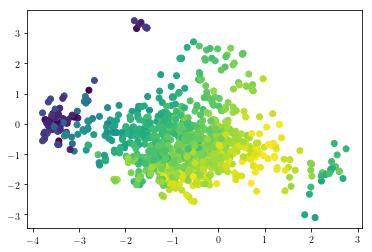

In [57]:
plt.scatter(data[:,0], data[:,1], c = c1, cmap = 'viridis')

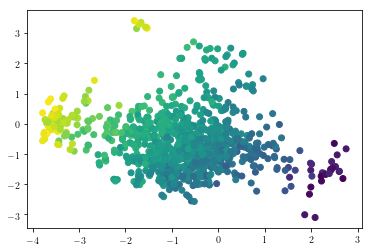

In [56]:
plt.scatter(data[:,0], data[:,1], c = selected_function_values_array[results['geom'].adjacency_matrix[0].indices,0], cmap = 'viridis')

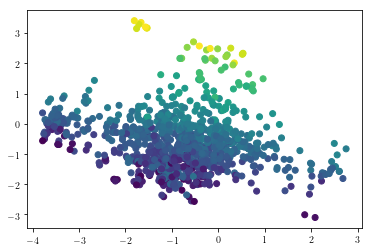

In [34]:
plt.scatter(data[:,0], data[:,1], c = c2, cmap = 'viridis')

In [48]:
pool.close()
pool.restart()

In [38]:
from pathos.multiprocessing import ProcessingPool as Pool
pool = Pool(7)

In [40]:
positions = np.load('/Users/samsonkoelle/thesis_data/processed_data_2/ethanol/positionseth_diagram_ts.npy')

In [41]:
c1 = selected_function_values_array[results['geom'].adjacency_matrix[0].indices,0]
c2 = selected_function_values_array[results['geom'].adjacency_matrix[0].indices,1]

In [46]:
atoms4_dicts= get_atoms_4(9, ii, jj)[0]

In [45]:
ii =  [0, 0, 0, 0, 1, 1, 1, 2]
jj = [1, 2, 3, 4, 5, 6, 7, 8]

In [74]:
n = 50000
selected_function_values = pool.map(
                lambda i: get_features(positions[i],
                                       atoms2 = np.asarray([]),
                                       atoms3 = np.asarray([]),
                                       atoms4 = atoms4_dicts[[9]]),
                data_stream_custom_range(list(range(n))))

selected_function_values_array = np.vstack([np.hstack(selected_function_values[i]) for i in range(n)])


In [51]:
atoms4_dicts[1]

array([3, 0, 1, 5])

array([1.73704336, 1.14754007, 0.91877222, ..., 1.2931742 , 3.07644632,
       1.05211955])

In [59]:
n = 50000
selected_function_values = pool.map(
                lambda i: get_features(positions[i],
                                       atoms2 = np.asarray([]),
                                       atoms3 = np.asarray([]),
                                       atoms4 = np.asarray([[7,6,5,1]])),
                data_stream_custom_range(list(range(n))))

selected_function_values_array = np.vstack([np.hstack(selected_function_values[i]) for i in range(n)])


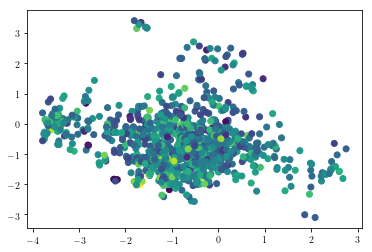

In [60]:
plt.scatter(data[:,0], data[:,1], c = selected_function_values_array[results['geom'].adjacency_matrix[0].indices,0], cmap = 'viridis')

In [63]:
atoms4_dicts[9]

array([1, 0, 2, 8])

In [64]:
atoms4_dicts

array([[2, 0, 1, 5],
       [3, 0, 1, 5],
       [4, 0, 1, 5],
       [2, 0, 1, 6],
       [3, 0, 1, 6],
       [4, 0, 1, 6],
       [2, 0, 1, 7],
       [3, 0, 1, 7],
       [4, 0, 1, 7],
       [1, 0, 2, 8],
       [3, 0, 2, 8],
       [4, 0, 2, 8]])

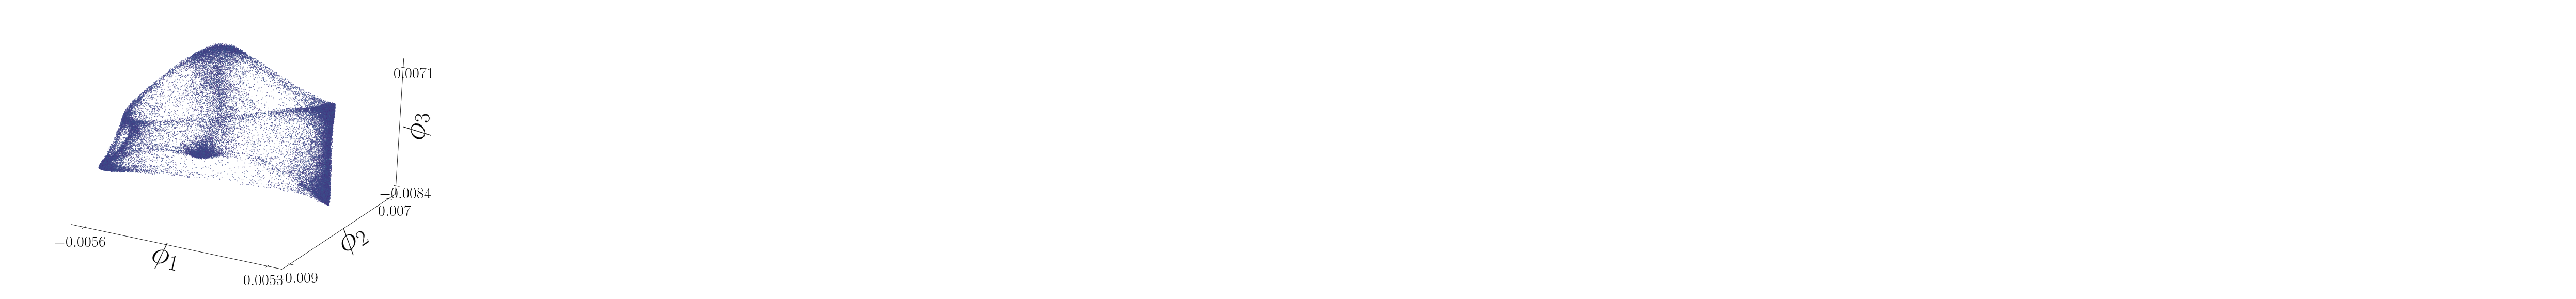

In [65]:
plot_manifold_3d(results['embed'], 1, 1, selected_function_values_array[:,0], '',title_color = 'black')


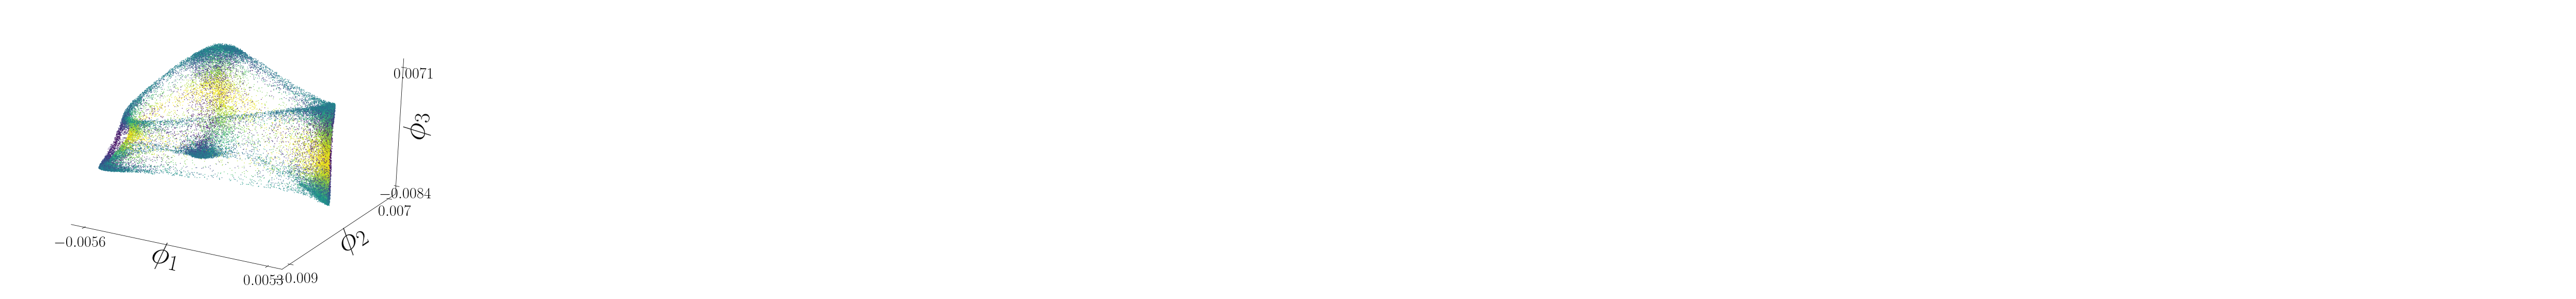

In [75]:
#%matplotlib inline
fig = plot_manifold_3d(results['embed'], 1, 1, selected_function_values_array[:,0], '',title_color = 'black')
#%fig.cbar()

AttributeError: 'Axes3DSubplot' object has no attribute 'autoscale_None'

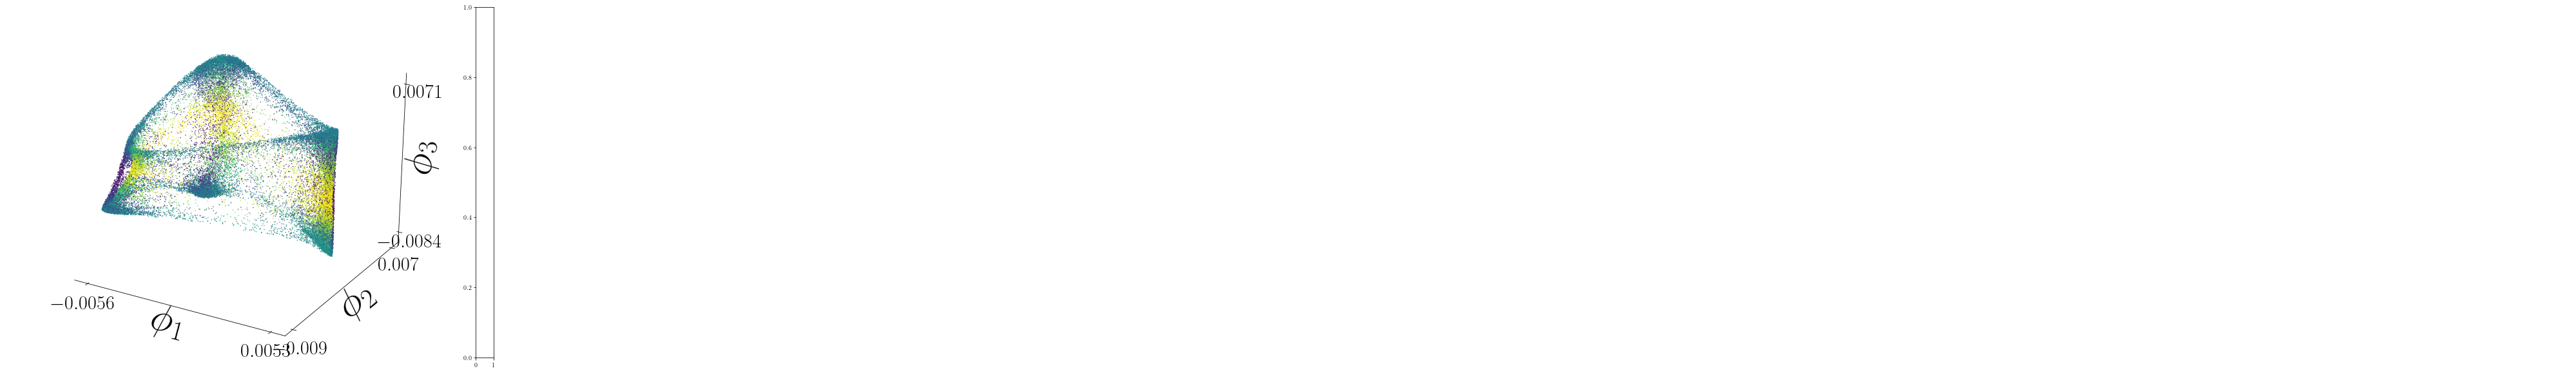

In [83]:
    data = results['embed']
    s = 1
    alpha = 1
    c = selected_function_values_array[:,0]
    title = ''
    title_color = 'black'
    fig, axs = plt.subplots(1,1, figsize = (15,10))
    axs.set_axis_off()

    selected_points = list(range(data.shape[0]))
    x = data[:, 0][selected_points]
    y = data[:, 1][selected_points]
    z = data[:, 2][selected_points]

    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(x, y, z, s=s,c = c, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.set_xlabel(r'$\phi_1$', fontsize = 60)
    ax.set_ylabel(r'$\phi_2$', fontsize = 60)
    ax.set_zlabel(r'$\phi_3$', fontsize = 60)
    ax.set_title(title, fontsize = 80, color = title_color)

    xmin = np.float(np.format_float_positional(data[:, 0][selected_points].min(), precision=2, fractional=False))
    xmax = np.float(np.format_float_positional(data[:, 0][selected_points].max(), precision=2, fractional=False))
    ymin = np.float(np.format_float_positional(data[:, 1][selected_points].min(), precision=2, fractional=False))
    ymax = np.float(np.format_float_positional(data[:, 1][selected_points].max(), precision=2, fractional=False))
    zmin = np.float(np.format_float_positional(data[:, 2][selected_points].min(), precision=2, fractional=False))
    zmax = np.float(np.format_float_positional(data[:, 2][selected_points].max(), precision=2, fractional=False))
    
    ax.set_xticks([xmin, xmax])
    ax.set_yticks([ymin, ymax])
    ax.set_zticks([zmin, zmax])
    ax.tick_params(labelsize=30)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    fig.colorbar(ax)

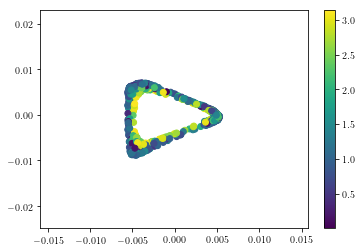

In [86]:
plt.scatter(data[:1000,0],data[:1000,1], c= c[:1000])
plt.colorbar()

In [92]:
cs = np.zeros(50000)
inds = results['geom'].adjacency_matrix[0].indices
cs[inds] = 1

In [91]:
#plot_manifold_3d(results['embed'], 1, 1, cs, '',title_color = 'black')

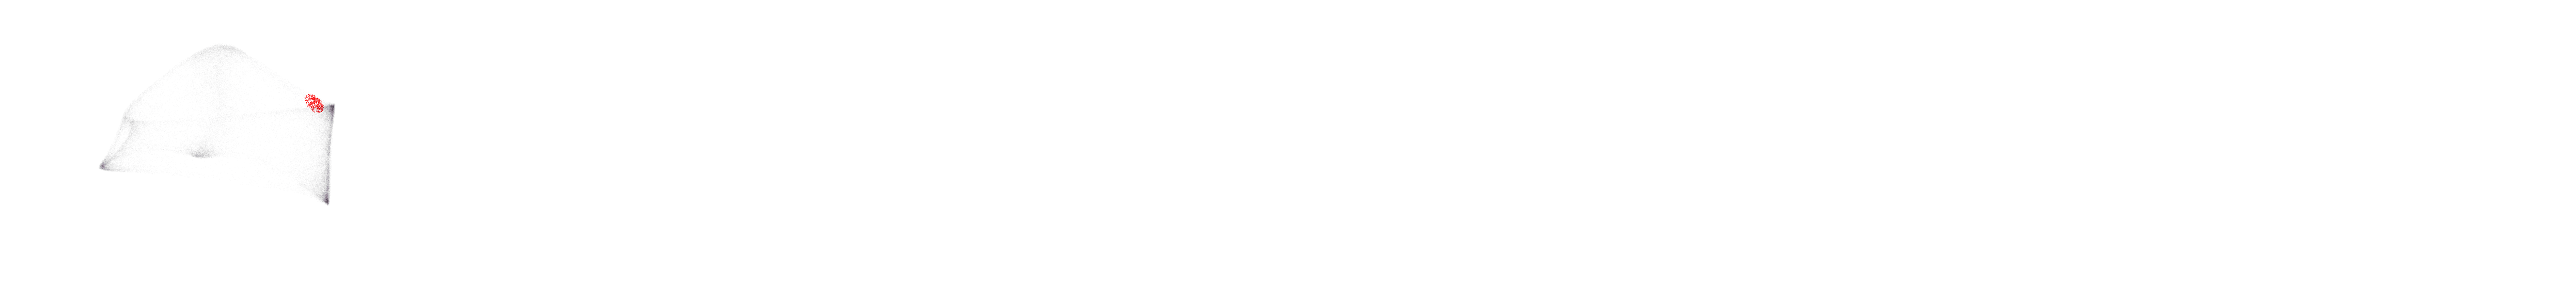

In [103]:
    data = results['embed']
    s = .01
    alpha = .1
    c = cs
    title = ''
    title_color = 'black'
    fig, axs = plt.subplots(1,1, figsize = (15,10))
    axs.set_axis_off()

    selected_points = list(range(data.shape[0]))
    x = data[:, 0][selected_points]
    y = data[:, 1][selected_points]
    z = data[:, 2][selected_points]

    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(x, y, z, s=s,c = 'black', alpha=alpha, marker='.',vmin=0,vmax=1)
    #ax.set_xlabel(r'$\phi_1$', fontsize = 60)
    #ax.set_ylabel(r'$\phi_2$', fontsize = 60)
    #ax.set_zlabel(r'$\phi_3$', fontsize = 60)
    ax.set_title(title, fontsize = 80, color = title_color)

    xmin = np.float(np.format_float_positional(data[:, 0][selected_points].min(), precision=2, fractional=False))
    xmax = np.float(np.format_float_positional(data[:, 0][selected_points].max(), precision=2, fractional=False))
    ymin = np.float(np.format_float_positional(data[:, 1][selected_points].min(), precision=2, fractional=False))
    ymax = np.float(np.format_float_positional(data[:, 1][selected_points].max(), precision=2, fractional=False))
    zmin = np.float(np.format_float_positional(data[:, 2][selected_points].min(), precision=2, fractional=False))
    zmax = np.float(np.format_float_positional(data[:, 2][selected_points].max(), precision=2, fractional=False))
    
    #ax.set_xticks([xmin, xmax])
    #ax.set_yticks([ymin, ymax])
    #ax.set_zticks([zmin, zmax])
    #ax.tick_params(labelsize=30)
    #ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    #ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    #ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    #fig.colorbar(ax)
    ax.set_axis_off()
    ax.scatter(x, y, z, s=s,c = c, alpha=alpha, marker='.',vmin=0,vmax=np.pi)
    ax.scatter(x[inds], y[inds], z[inds], s=1,c = 'red', alpha=1, marker='.',vmin=0,vmax=np.pi)

In [99]:
inds = np.where(np.linalg.norm(data[0,:] - data[:,:], axis = 1) < .001)[0]

In [100]:
inds.shape

(355,)